Now we will use Pytorch's nn module to build neural networks which has lot of classes, functions and methods that help us build large Neural Networks in a more efficient way. We will also use the torchvision package that comes with pytorch, it a utilities package for vision related problems (contains models, datasets, etc)

Image representation in computers:
----------------------------------
To tackle the problem of image representation in screen the images need to converted/broken down to Data. The Data being RGB triplets of varyi
Pixels are Tiny dots of light on a screen, that in turn are made of three colors of tinier dots of light of color Red, Blue and Green.
Each pixels in computers is represented by such RGB triplets of varying intensity. Higher the intensity lighter the color and vice-versa.
For the RGB triplets, each color representation is saved as a decimal value ranging from 0-255. Why? because the data is stored in the from of bits (0 or 1/ on or off), 8 Bits to be exact that's why the 255 is the range, as computers understand only 1 or 0. This is stored in a file as byte triplets or for easier representation as hex code (shorter representaion). For grayscale the number of channels is just one. RGB Primary colors in-case of screen display system. 

The theory behind additive color mixing is governed by Grassmans law. It doesn't specify what promary colors or how many you need. 
In fact you can build using any color and number. The range of colors produced is called the color gamut. RGB has the largest color gamut that's why it is preferred. Not all colors detectable by the human eye can be produced by RGB. 

Two terms to know:

Resolution: Refers to the number of pixels horizzontally and vertically on a screen
and another new feature is the density (smaller screen can have the same number of pixels) 

### MNIST

Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module nn that provides a nice way to efficiently build large neural networks.

In [1]:
# Import necessary packages
import numpy as np
import torch
#import helper
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels.

Our goal is to build a neural network that can take one of these images and predict the digit in the image.

First up, we need to get our dataset. This is provided through the torchvision package. The code below will download the MNIST dataset, then create training and test datasets for us. Don't worry too much about the details here, you'll learn more about this later.

In [2]:
# this package provides tools and datasets for vision realted problems
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 9449276.45it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 103438.28it/s]           
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2145242.83it/s]                           
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 35224.46it/s]            

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training, like

for image, label in trainloader:
    #do things with images and labels

You'll notice I created the trainloader with a batch size of 64, and shuffle=True. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

Here dataloader is a generator

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


np.squeeze: remove single dimensional entries from the shape of an array

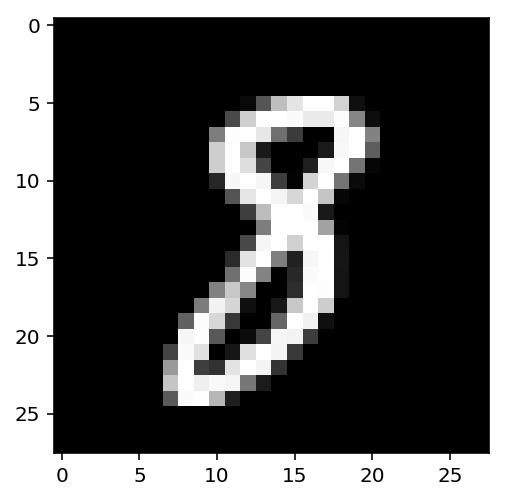

In [4]:
# matplot function sto show and image from numpy array
plt.imshow(images[5].numpy().squeeze(), cmap='Greys_r')

First, let's try to build a simple network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

The networks you've seen so far are called fully-connected or dense networks. Each unit in one layer is connected to each unit in the next layer. In fully-connected networks, the input to each layer must be a one-dimensional vector (one for each element of the vector)(which can be stacked into a 2D tensor as a batch of multiple examples). However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape (64, 1, 28, 28) to a have a shape of (64, 784), 784 is 28 times 28. This is typically called flattening, we flattened the 2D images into 1D vectors.

Previously you built a network with one output unit. Here we need 10 output units, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network output into a probability distribution next.

Exercise: Flatten the batch of images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [5]:
# activation function
def sigmoid(x):
    return 1/(1+torch.exp(-x)) # torch tensor exp: retruns exp on all the tensor elements

In [6]:
# flatten the images
inputs = images.view(64, -1)

# define the #no of units in each layer
n_input = inputs.shape[1]
n_hidden = 256
n_output = 10 

## initialize weight matrices

# input to hidden layer
W1 = torch.randn(n_input, n_hidden) 
B1 = torch.rand(n_hidden)

# hidden to output layer
W2 = torch.randn(n_hidden, n_output) # hidden to output layer
B2 = torch.rand(n_output)

H = sigmoid(torch.mm(inputs, W1)+ B1)
out = torch.mm(H, W2) + B2
print(out.shape)

torch.Size([64, 10])


Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this: <img src='assets/image_distribution.png' width=500px>

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the softmax function. Mathematically this looks like

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

Exercise: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across each column while dim=1 takes the sum across each row.

In [7]:
def softmax(x):
    ## save the exp of the tensor, then divide the exps with row sum 
    x_exp = torch.exp(x)
    return x_exp/torch.sum(x_exp, dim=1).view(-1, 1) # dim=1 sum across each row and dim=0 across each column

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


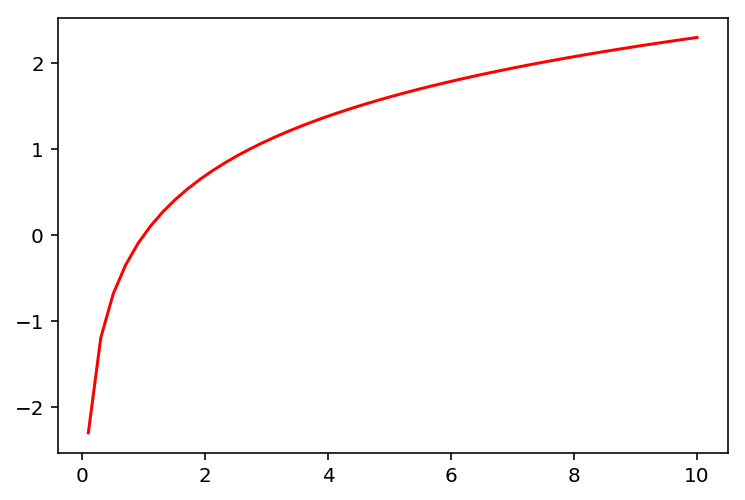

In [8]:
x = np.linspace(0.1, 10)
plt.plot(x, np.log(x), color='r')
plt.show();

Log function for non-postive values is not defined. From the graph it is clear that for input between 0 and 1 the base e log fucntion gives negative values. Hence for cross entropy the higher the prob input higher more neagtive the output else if very small value the output is more negative (unwanted). 

### Building networks with PyTorchBuilding networks with PyTorch
PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

Sigmoid function in pytorch is implemeted both as a module and a fucntion for historical reasons (based on old lua torch7) where you could use it in a Sequential Model

In [9]:
from torch import nn

In [10]:
class Network(nn.Module):
    
    def __init__(self, n_in, n_h, n_out):
        # super() here refers to base class, call the Base class constructor (nn.Module)
        # to register this class as a our model 
        super().__init__() 
        # input to hidden layer linear transformation of incoming data (XW+B)
        self.i2h = nn.Linear(n_in, n_h) # create object: weight and bias are initialized automatically 
        # hidden to output layer linear tranforamtion of incoming data (XW+B)
        self.h2o = nn.Linear(n_h, n_out) # create object: weight and bias are initialized automatically 
        # activations objects
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x): 
        # here x is the input tensor, method autmatically called when model is run with data
        h = self.sigmoid(self.i2h(x))
        out = self.softmax(self.h2o(h))
        return out

Let's go through this bit by bit.

`class Network(nn.Module):`
Here we're inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.

`self.hidden = nn.Linear(784, 256)`
This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

`self.output = nn.Linear(256, 10)`
Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

`self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)`

Here I defined operations for the sigmoid activation and softmax output. Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

`def forward(self, x):`
PyTorch networks created with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations you defined in the __init__ method.

`x = self.hidden(x)
 x = self.sigmoid(x)
 x = self.output(x)
 x = self.softmax(x)`

Here the input tensor x is passed through each operation a reassigned to x. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the __init__ method doesn't matter, but you'll need to sequence the operations correctly in the forward method.

Now we can create a Network object.

In [11]:
# hyperparms:
n_in = inputs.shape[1]
n_h = 256
n_out = 10 

In [12]:
# create the model object
model = Network(n_in, n_h, n_out)
print(model) # this shows the layers of our model

# to check the weights and bias (select the layer)
print(model.i2h.weight)
print(model.h2o.bias)

Network(
  (i2h): Linear(in_features=784, out_features=256, bias=True)
  (h2o): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)
Parameter containing:
tensor([[ 0.0042,  0.0347, -0.0253,  ..., -0.0324, -0.0337,  0.0023],
        [-0.0148, -0.0084, -0.0181,  ...,  0.0096, -0.0100,  0.0003],
        [ 0.0076,  0.0289, -0.0290,  ...,  0.0148,  0.0014,  0.0136],
        ...,
        [ 0.0045,  0.0245, -0.0080,  ..., -0.0166, -0.0139, -0.0174],
        [ 0.0344, -0.0102, -0.0352,  ..., -0.0152,  0.0186,  0.0139],
        [-0.0340,  0.0038,  0.0061,  ..., -0.0148,  0.0356, -0.0056]],
       requires_grad=True)
Parameter containing:
tensor([-0.0109, -0.0131, -0.0050, -0.0353,  0.0242,  0.0538, -0.0519, -0.0516,
         0.0392,  0.0544], requires_grad=True)


We can write this architecture in a more concise and readable format using torch.nn.functional module, preferred as most opeartions are element wise operations. We normally import this module as F, import torch.nn.functional as F. 

In [13]:
import torch.nn.functional as F

In [14]:
class Network(nn.Module):
    
    def __init__(self, n_in, n_h, n_out):
        super().__init__() 
        # input to hidden layer linear transformation of incoming data (XW+B)
        self.i2h = nn.Linear(n_in, n_h) 
        # hidden to output layer linear tranforamtion of incoming data (XW+B)
        self.h2o = nn.Linear(n_h, n_out)
        
    def forward(self, x):
        h = F.sigmoid(self.i2h(x))
        out = F.softmax(self.h2o(h), dim=1)
        return out

## Activation functions
So far we've only been looking at the sigmoid activation function, but in general any function can be used as an activation function. The only requirement is that for a network to approximate a non-linear function, the activation functions must be non-linear. Here are a few more examples of common activation functions: Tanh (hyperbolic tangent), and ReLU (rectified linear unit).

<img src="assets/activation.png" width=700px>

In practice, the ReLU function is used almost exclusively as the activation function for hidden layers.

## Your Turn to Build a Network
<img src="assets/mlp_mnist.png" width=600px>

Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.

In [15]:
class Network(nn.Module):
    
    def __init__(self, n_in, n_h1, n_h2,n_out):
        super().__init__()
        self.l_in = nn.Linear(n_in, n_h1)
        self.l_h1 = nn.Linear(n_h1, n_h2)
        self.l_h2 = nn.Linear(n_h2, n_out)
        
    def forward(self, x):
        x = F.relu(self.l_in(x))
        x = F.relu(self.l_h1(x))
        x = self.l_h2(x)
        return F.softmax(x, dim=1)

n_in, n_h1, n_h2,n_out = (784, 128, 64, 10) 
model = Network(n_in, n_h1, n_h2,n_out)

In [16]:
# dsiplay the module layers defined for the model 
print(model)

Network(
  (l_in): Linear(in_features=784, out_features=128, bias=True)
  (l_h1): Linear(in_features=128, out_features=64, bias=True)
  (l_h2): Linear(in_features=64, out_features=10, bias=True)
)


## Initializing weights and biases
The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.

In [17]:
# display the weight and bias after selecting a layer
print(model.l_in.weight)
print(model.l_in.bias)

Parameter containing:
tensor([[-6.6897e-03,  1.1632e-02, -2.0753e-03,  ..., -2.6701e-04,
         -2.8702e-02,  1.0052e-03],
        [ 2.2251e-02, -1.0673e-02,  2.8560e-02,  ...,  3.5141e-02,
          2.0982e-02,  3.3515e-02],
        [-6.0767e-05, -2.5685e-02,  2.6583e-02,  ..., -3.0711e-02,
         -1.0225e-02, -8.7366e-03],
        ...,
        [ 1.9360e-02, -1.0326e-03,  6.6005e-03,  ..., -2.5970e-02,
         -2.5118e-02,  1.2948e-02],
        [-3.4316e-02, -1.0443e-04, -1.5001e-02,  ..., -3.3174e-02,
          1.2399e-02,  2.2944e-02],
        [-1.1074e-02, -2.7571e-02,  5.9909e-03,  ...,  3.3606e-02,
          2.7295e-02, -1.0138e-03]], requires_grad=True)
Parameter containing:
tensor([ 2.5868e-03, -2.4159e-02, -1.8564e-02,  3.0726e-02, -4.9099e-06,
         8.6027e-03, -1.7182e-02, -3.6637e-03, -3.9858e-03,  3.3719e-03,
         6.3337e-03, -1.7194e-02,  2.4030e-02, -8.7741e-03, -3.4937e-02,
        -9.7067e-03,  2.2962e-02,  6.7246e-04, -3.1161e-02,  3.1124e-02,
        -2.9

For custom weight initialization, we need to change the tensors in place ( _ ). The weights and bias are actually autograd Variables and need to get the data by using model.weight.data. After getting the tensors we can fill them with 0s or from random normal distribution.

In [18]:
# fill bias with zeros, modify in-place
# get the actual tensors from the autograd variable, detach the autograd from it
print(model.l_in.bias.data.fill_(0))
# fill weight with random noram values
print(model.l_in.weight.data.normal_(std=0.01)) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[ 0.0046,  0.0064,  0.0132,  ..., -0.0119,  0.0044,  0.0007],
        [ 0.0025, -0.0177,  0.0015,  ..., -0.0080,  0.0116, -0.0191],
        [ 0.0111,  0.0108,  0.0150,  ...,  0.0056,  0.0004,  0.0015],
        ...,
        [ 0.0057, -0.0136,  0.0011,  ..., -0.0016, -0.0016,  0.0091],
        [ 0.0161,  0.0041,  0.0237,  ...,  0.0070, -0.0096, -0.0003],
        [ 0.0120,  0.0009,  0.0009,  ..., -0.0053,  0.0033, -0.0075]])


## Forward Pass

In [19]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

tensor([[0.1106, 0.0947, 0.1105, 0.1019, 0.0927, 0.0881, 0.0974, 0.0965, 0.1018,
         0.1058]], grad_fn=<SoftmaxBackward>)


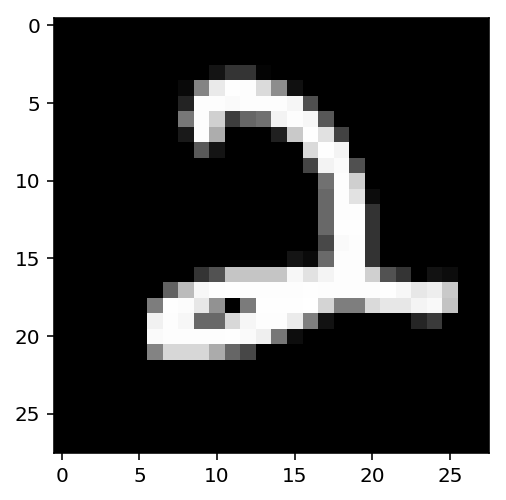

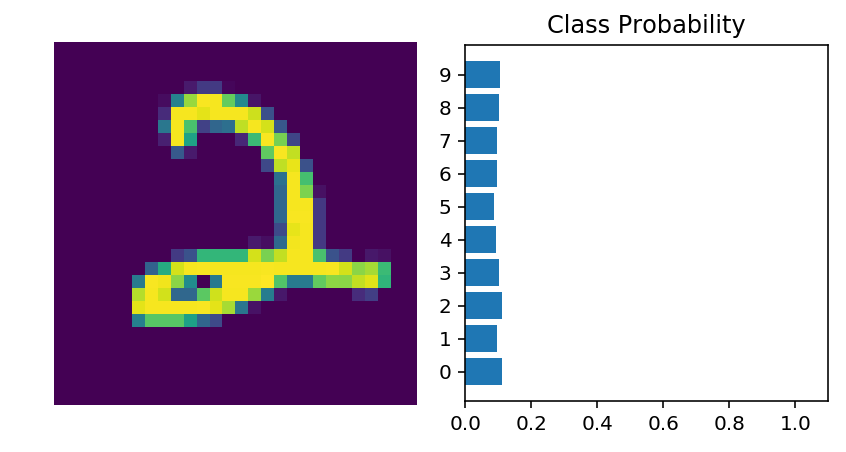

In [20]:
# let's pass an image through the network
data_iter = iter(trainloader) # turn the dataloader object into iter(generator)
images, labels = dataiter.next()

# image number
img_idx = 2
in_image = images[img_idx]
plt.imshow(in_image.numpy().squeeze(), cmap='Greys_r')

# resize the image to be passed through the network
in_image.resize_(1, 784)
# probabilities
ps = model.forward(in_image)
# since the model is not trained the distribution is more or less uniform
print(ps)
view_classify(in_image.view(1, 28, 28), ps)
plt.show();

## Using nn.Sequential

Sequential is another convenient way to apply operations to our tensors and define our model. It is basically a container where the operations defined in a order are taken to be in that order of precedence. We can also pass and ordered dictionary of module operations and refer to them with thier name instead of using the index.

tensor([[0.0793, 0.0906, 0.0802, 0.1004, 0.1311, 0.1116, 0.0760, 0.1250, 0.0990,
         0.1069]], grad_fn=<SoftmaxBackward>)


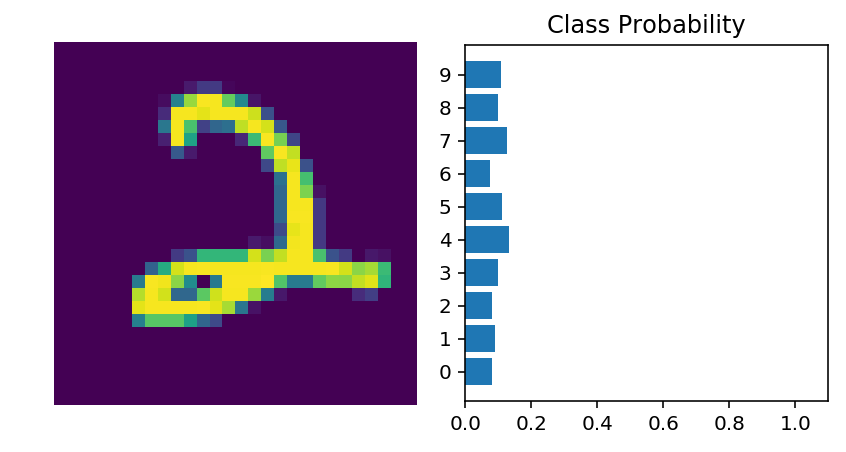

In [21]:
# hyper_params
n_in, n_h1, n_h2, n_out = (784, 128, 64, 10)

# deifne the model operations 
model = nn.Sequential(
                      nn.Linear(n_in, n_h1),
                      nn.ReLU(), 
                      nn.Linear(n_h1, n_h2),
                      nn.ReLU(),
                      nn.Linear(n_h2, n_out),
                      nn.Softmax(dim=1)
                     )

ps = model.forward(in_image)
# since the model is not trained the distribution is more or less uniform
print(ps)
view_classify(in_image.view(1, 28, 28), ps)
plt.show();

In [22]:
# to acces a layer model use indexing
print(model[0].weight.data.shape)

torch.Size([128, 784])


In [23]:
# using ordered Dictionary
from collections import OrderedDict


tensor([[0.1199, 0.1136, 0.0802, 0.0751, 0.1052, 0.1044, 0.1081, 0.0871, 0.1072,
         0.0991]], grad_fn=<SoftmaxBackward>)


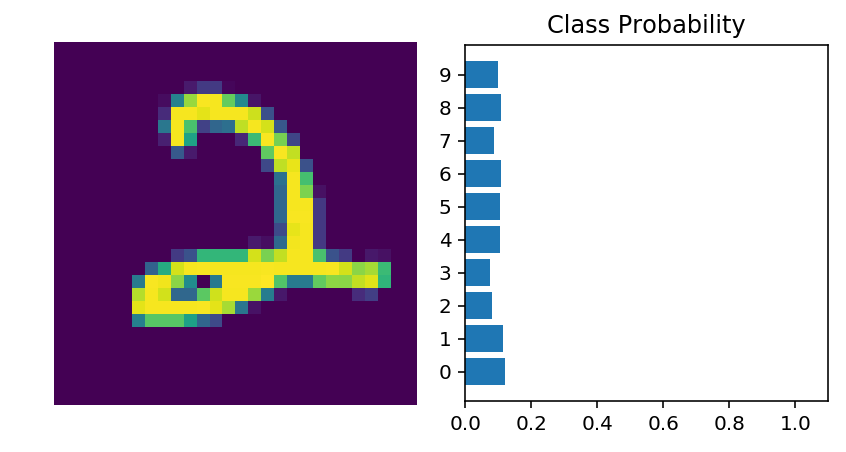

In [24]:
# OrderedDict(): supply list of key-value tuples

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(n_in, n_h1)),
                      ('relu1', nn.ReLU()), 
                      ('fc2', nn.Linear(n_h1, n_h2)),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(n_h2, n_out)),
                      ('softmax', nn.Softmax(dim=1))
                    ]))

ps = model.forward(in_image)
# since the model is not trained the distribution is more or less uniform
print(ps)
view_classify(in_image.view(1, 28, 28), ps)
plt.show();

In [25]:
# now we can access a layer with the key value
print(model.fc1.weight.data)

tensor([[ 0.0328,  0.0253,  0.0167,  ..., -0.0033,  0.0330, -0.0222],
        [-0.0322,  0.0306,  0.0092,  ...,  0.0262,  0.0091, -0.0266],
        [ 0.0348,  0.0276,  0.0199,  ..., -0.0247,  0.0118,  0.0311],
        ...,
        [ 0.0046, -0.0115, -0.0221,  ..., -0.0045,  0.0094,  0.0233],
        [-0.0308, -0.0351, -0.0051,  ..., -0.0101, -0.0298,  0.0070],
        [-0.0018, -0.0074, -0.0084,  ..., -0.0349,  0.0234,  0.0081]])
